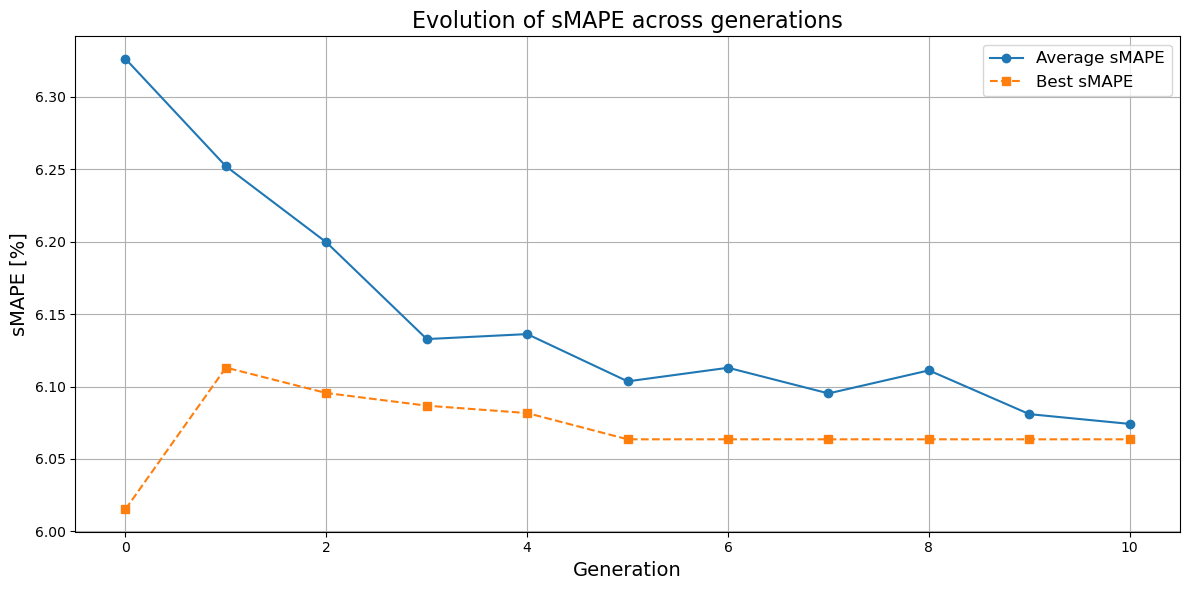

In [7]:
# Plot sMAPE evolution across generations from logbook_smape.csv

import pandas as pd
import matplotlib.pyplot as plt

# Load flat logbook
log_df = pd.read_csv("logbook_smape.csv")

# Basic sanity checks
required_cols = {"gen", "avg_smape", "min_smape"}
missing = required_cols - set(log_df.columns)
if missing:
    raise ValueError(f"Missing columns in logbook_smape.csv: {missing}")

# Sort by generation (just in case) and drop NaNs
log_df = log_df.sort_values("gen").reset_index(drop=True)
log_df = log_df.dropna(subset=["avg_smape", "min_smape"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(log_df["gen"], log_df["avg_smape"], label="Average sMAPE", marker="o")
plt.plot(log_df["gen"], log_df["min_smape"], label="Best sMAPE", marker="s", linestyle="--")

# Labels and title
plt.xlabel("Generation", fontsize=14)
plt.ylabel("sMAPE [%]", fontsize=14)
plt.title("Evolution of sMAPE across generations", fontsize=16)

# Grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Tight layout & show
plt.tight_layout()
plt.show()